# __Study of Various Indicators of Fake Job Postings__

#### Project done by Srujana Gali, Riddhima Shukla, Paulin Jesintha, Emily Xiaoqi He, and Sucheta Das

### Contents

I. __Introduction and Motivation__

II. __Project Description__

    1. Problem Statement
    2. Data Source
    3. Data Dictionary

III. __Data Analysis__

    1. About the Data 
    2. Data Cleaning and Pre-processing
    3. Data Exploration and Investigation
    
IV. __Conclusion__

V. __Area of Improvement__

VI. __Tableau Dashboards__

## I. Introduction and Motivation

Fraudulent job postings can be referred to as a situation where individuals/groups post about non-existent job vacancies or imitate a reputable employer and create fake listings, to attract students and other job seekers to satisfy illegitimate needs such as stockpiling talent without actual requirements, email spamming, money looting, etc. 

Studies show that (https://cnb.cx/3yOrkZc) Americans were scammed out of $68 million due to fake business and job opportunities in the first quarter of 2022, according to the Federal Trade Commission, as frauds continue to leverage pandemic stress and the hot job market to con job-seekers out of money and their personal financial information.

Hence, our main objective is to solve the problem of fake employment listings and provide authentic and accurate data to job seekers by effectively identifying fraudulent job postings in the American Market. For this, we will be analyzing a public dataset from Kaggle that displays intricate data on various types of job postings in the United States and filter out fraudulent job postings.

## II. Project Description

### 1. Problem Statement

Whenever we get a message in our inbox about a job posting from a company that is not very well known, we are extremely sceptical about applying for it as we do not know whether it is a real job posting or a fallacious one. According to DNA India, economist Nouriel Roubini has made a damning prediction about an impending "severe, long and ugly" downturn at the end of this year. This would be an appropriate opportunity for scammers. Most scammers do this to get personal information from the person they are scamming. Personal information can include addresses, bank account details, social security numbers, etc. Some of them will even ask for money in return. The main goal of our project is to identify a job as fake or real. The final result is evaluated based on two different models. Since the data provided has numeric and text features, one model will be used for the text data and another for the numeric data. The final output will be a combination of the two. We will implement machine learning models on the dataset to produce a final result, determining whether the job is real or not.

### 2. Data Source

The Employment Scam Aegean Dataset (EMSCAD) is provided by the University of Aegean which is a publicly available dataset containing 17,880 real-life job ads. The data is from the survey made from 2018 to 2020. The link of the dataset is currently not available as the university has taken it down.

__Kaggle Link:__

https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction 

__References:__

https://towardsdatascience.com/predicting-fake-job-postings-part-1-data-cleaning-exploratory-analysis-1bccc0f58110
https://towardsdatascience.com/fake-job-predictor-a168a315d866

The dataset is a combination of integer, binary, and textual data types.

### 3. Data Dictionary

* job_id : Unique Identification number given to each job posting
* title : Names to describe the job roles
* location : Geographical location of the job (includes countries, states, and cities)
* salary_range : Monetary compensation
* department : cateogry of the job title 
* company_profile : Brief summary about the company
* description : Job roles and responsibilities
* requirements : Essential skillsets for the job role
* benefits : Additional compensations for the job
* telecommuting : Mode of work (work from home / hybrid / onsite)
* has_company_logo : Presence of company logo
* has_questions : Presence of questions in job application
* employment_type : Employment classification types
* required_experience : Previous industry exposure
* required_education : Previous academic exposure
* industry : Company domain
* function : Job domain
* fraudulent : Classification of job postings

## III. Data Analysis

### 1. About the Data

In this section, the dataset contains 17,880 rows and 18 columns. Furthermore, each of the columns is also being explored in the dataset with and without the null values. 

In [ ]:
## Viewing the dataset

In [19]:
%%bigquery
SELECT *
FROM `ba775-fall22-a3.TeamProjecta3.Job_Postings` 
ORDER BY job_id
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.47rows/s]


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,None,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,None,None,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,None,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",None,None,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,None,None,None,None,None,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,None,Our passion for improving quality of life thro...,THE COMPANY: ESRI ‚Äì Environmental Systems Re...,"EDUCATION:¬†Bachelor‚Äôs or Master‚Äôs in GIS,...",Our culture is anything but corporate‚Äîwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",None,None,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### 2. Data Cleaning and Pre-processing

In the real world, the data is always cluttered, just like the one in this dataset. Therefore, cleaning and preprocessing the data will increase productivity and efficiency in the decision-making process.

In this dataset, we use the raw data and clean it from its convoluted form to investigate different indicators in the job postings. Upon examination, the columns "department" and "salary_range" have been excluded due to the absence of major chunks of data. Moreover, the column "location" is a concatenation of cities, states, and countries. Thus, the "location" has been split into three different columns, respectively. Additionally, the job postings from the United States are being analyzed in this project as most of the data collected belongs to this region.

In [2]:
## Dataset without null values

Out of 17880 rows, only 6333 values are present for "department" and 2868 values are present for "salary_range". As a result, these columns are not being taken into consideration for further analysis. 

In [ ]:
## Splitting the location into countries, states, cities

In the below 2 cells, we are firstly splitting the location into three specific columns, namely country, state, and city. Furthermore, we are deleting the column named 'location' as the column does not serve any purpose anymore after the split.
(Please note, the code below has an error as it was run again after deleting the column location and the code does not recognise this anymore.)

In [8]:
%%bigquery
SELECT job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo	, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent,
    SPLIT(location, ',') [safe_ordinal(1)] as country,
     SPLIT(location, ',') [safe_ordinal(2)] as state,
         SPLIT(location, ',') [safe_ordinal(3)] as city,
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
GROUP BY job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo	, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent

Executing query with job ID: a4d0c027-12ec-423f-a2b7-5c2c4b0bac11
Query executing: 0.30s


ERROR:
 400 Unrecognized name: location at [1:23]

Location: US
Job ID: a4d0c027-12ec-423f-a2b7-5c2c4b0bac11



In [ ]:
## Dropping the column location after its split

The column 'location' has been dropped as it is irrelevant after the splitting of countries, states, and cities.

In [11]:
%%bigquery
ALTER TABLE `ba775-fall22-a3.TeamProjecta3.job_postings_list`
DROP COLUMN location 

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 836.69query/s] 


""


In [ ]:
## Deleting all countries other than the United states 

The column 'country' has been dropped in order to retain the job details only for the United States and the same is followed throughout the document for the analysis. The United States job details have data consistency, volume and reliability. 

In [25]:
%%bigquery
DELETE FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
WHERE country <> 'US' 

Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 1402.66query/s]                        


""


In [ ]:
## Deleting all null values from country column

Removing all the null values from the 'country' column to get more accurate results with a reduction of rows from 11,002 to 10,656 rows. 

In [31]:
%%bigquery
DELETE FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
WHERE country IS null

Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 1612.57query/s]                        


""


In [ ]:
## Viewing the clean data

In [12]:
select *
from `ba775-fall22-a3.TeamProjecta3.job_postings_list`
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.41rows/s]


,job_id,title,country,state,city,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,145,Forward Cap.,None,None,None,None,None,None,The group has raised a fund for the purchase o...,None,None,0,0,0,None,None,None,None,None,1
1,526,Sr. Ruby,None,None,None,None,13000-16000,None,Plated is looking for a full stack ruby on rai...,Plated is looking for a full stack ruby on rai...,Plated is looking for a full stack ruby on rai...,1,0,0,Full-time,Internship,Bachelor's Degree,Banking,None,0
2,1243,Software Engineer,None,None,None,Engineering,None,None,UI engineeringMachine learningWeb engineeringS...,None,None,0,1,0,None,None,None,None,None,0
3,1443,Content Acquisition Editor,None,None,None,Content,None,None,Skillshare is looking to add key players to ou...,None,None,0,0,0,None,None,None,None,None,0
4,1710,Assistance on start-up,None,None,None,None,None,None,We're a yound and crazy start-up of greeks aro...,Passion to make a positive impact !,None,1,0,0,Part-time,Internship,None,Maritime,Engineering,0


In [ ]:
## Data pre-processing

In [4]:
%%bigquery 
SELECT COUNT(job_id) as n_job_id, 
COUNT(title) as n_title , 
COUNT(country) as n_country, 
COUNT(state) as n_state,
COUNT(city) as n_city,
COUNT(company_profile) as n_company_profile, 
COUNT(description) as n_description, 
COUNT(requirements) as n_requirements , 
COUNT(benefits) as n_benefits , 
COUNT(telecommuting) as n_telecommuting, 
COUNT(has_company_logo) as n_has_company_logo, 
COUNT(has_questions) as n_has_questions , 
COUNT(employment_type) as n_employment_type, 
COUNT(required_experience) as n_required_experience, 
COUNT(required_education) as n_required_education, 
COUNT(industry) as n_industry, 
COUNT(function) as n_function,
COUNT(fraudulent) as n_fraudulent
    FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.23s/rows]


,n_job_id,n_title,n_country,n_state,n_city,n_company_profile,n_description,n_requirements,n_benefits,n_telecommuting,n_has_company_logo,n_has_questions,n_employment_type,n_required_experience,n_required_education,n_industry,n_function,n_fraudulent
0,10656,10656,10656,10593,10593,8580,10651,8882,5976,10656,10656,10656,8894,6372,6179,7974,6752,10656


### 3. Data Exploration and Investigation

In the data exploration and investigation part, we will get to know the data which makes it easier to navigate and use the data later. With the right questions and investigation we can have a deeper understanding of how things work and even enable predictive abilities.

#### 3.1 What is the total number of unique specimens in each of the columns?

In [2]:
%%bigquery
SELECT
    COUNT(*) AS no_of_rows,
    COUNT(DISTINCT job_id) AS job_id, 
    COUNT(DISTINCT title) AS title, 
    COUNT(DISTINCT title) AS country,
    COUNT(DISTINCT title) AS state,
    COUNT(DISTINCT title) AS city,
    COUNT(DISTINCT company_profile) AS company_profile, 
    COUNT(DISTINCT requirements) AS requirements, 
    COUNT(DISTINCT has_company_logo) AS has_company_logo, 
    COUNT(DISTINCT employment_type) AS employment_type, 
    COUNT(DISTINCT required_experience) AS required_experience, 
    COUNT(DISTINCT required_education) AS required_education,
    COUNT(DISTINCT industry) AS industry,
    COUNT(DISTINCT function) AS function,
    COUNT(DISTINCT title) AS fraudulent,
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.16s/rows]


,no_of_rows,job_id,title,country,state,city,company_profile,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,10656,10656,6476,6476,6476,6476,885,6485,2,5,7,13,124,37,6476


From the above query, we can get to know the distinct values of each column.

#### 3.2 Which are the most frequent job titles?

In [8]:
%%bigquery
SELECT title, COUNT(title) AS job_title_count
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 
GROUP BY title
HAVING COUNT(title) > 1
ORDER BY job_title_count DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.99rows/s]


,title,job_title_count
0,English Teacher Abroad,295
1,Graduates: English Teacher Abroad (Conversatio...,144
2,Customer Service Associate,136
3,English Teacher Abroad,89
4,English Teacher Abroad (Conversational),83


Job listings have different categories of titles. For example, Technical Consultant, Mathematics Professor, Software Engineer, etc. From the dataset, the job title which is most frequent is the English Teacher Abroad role.

#### 3.3 What kind of employment is the most fraudulent type?

In [36]:
%%bigquery
SELECT title, COUNT(fraudulent) AS fraudulent_listings
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
WHERE fraudulent=1
GROUP BY title
ORDER BY fraudulent_listings DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.94rows/s]


,title,fraudulent_listings
0,Data Entry Admin/Clerical Positions - Work Fro...,21
1,Cruise Staff Wanted *URGENT*,21
2,Home Based Payroll Typist/Data Entry Clerks Po...,21
3,Customer Service Representative,17
4,Administrative Assistant,16
5,Payroll Data Coordinator Positions - Earn $100...,10
6,Network Marketing,10
7,Payroll Clerk,10
8,"Account Sales Managers $80-$130,000/yr",10
9,Data Entry,9


According to the above query, the job title which is the most fraudulent type is the Contact Center Representatives title. It belongs to the full-time category, and the state where this job listing has been posted was Nevada.

#### 3.4 In the dataset, how many are fraudulent jobs and how many are not?

In [61]:
%%bigquery
SELECT COUNT(fraudulent) AS listings_count,
IF(fraudulent = 0, 'Not Fraud', 'Fraud') AS is_fraud
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 
GROUP BY fraudulent
ORDER BY listings_count DESC

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.89rows/s]


,listings_count,is_fraud
0,9926,Not Fraud
1,730,Fraud


From the dataset, 9926 job listings are not fraud and 730 are fraud. In our real lives, we face the exact situation where the fraudulent job listings are hard to differentiate as the ratio between fradulent and non-fraudulent job types is extremely contrasting 

#### 3.5 How many fraudulent job postings have company logos?

In [62]:
%%bigquery
SELECT COUNT(fraudulent)AS number_of_fake_postings_with_logo, has_company_logo
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 
WHERE has_company_logo = 1
AND fraudulent = 1
GROUP BY has_company_logo

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.19s/rows]


,number_of_fake_postings_with_logo,has_company_logo
0,263,1


Out of 730 fraudulent jobs, 263 job postings have a company logo. It means that most of the fraudulent job types do not have logos. From this, we can analyze that if a job posting does not have the company logo, there is a higher chance that it might be fraudulent.

#### 3.6 What are the top 10 industries with the highest number of fake job postings?

In [63]:
%%bigquery
SELECT industry, COUNT (fraudulent) AS no_of_fake_job_posts
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 
WHERE industry != 'None' and fraudulent= 1
GROUP BY industry
ORDER BY no_of_fake_job_posts DESC
LIMIT 10;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  9.00rows/s]


,industry,no_of_fake_job_posts
0,Oil & Energy,106
1,Accounting,50
2,Hospital & Health Care,49
3,Marketing and Advertising,39
4,Information Technology and Services,31
5,Financial Services,27
6,Telecommunications,24
7,Real Estate,24
8,Consumer Services,22
9,"Leisure, Travel & Tourism",21


Of all the industries, Oil & Energy has the highest number of fake job posts. Next to Oil & Energy, Accounting and Hospital & Health Care industries have the highest number of fake job postings 

#### 3.7 What are the top 3 states prone to fake job postings?

In [69]:
%%bigquery
SELECT state, COUNT(fraudulent) AS n_COUNT
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
WHERE fraudulent= 1 
GROUP BY state
ORDER BY n_COUNT DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.67rows/s]


,state,n_COUNT
0,TX,152
1,CA,143
2,NY,68


Of all 50 states in the United States, Texas, California and New York have the highest number of job postings. If we compare the above queries with this query, we can say that if the job posting is from Texas, California or New York, does not have a company logo, and the job title is customer service associate there is a high chance that the job posting is fraudulent.

This is how we can compare all kind of job postings and analyze whether the job posting is fraudulent or not.

#### 3.8 What percentage of telecommuting jobs are fraudulent in nature?

In [6]:
%%bigquery
SELECT count(fraudulent) as Fake_wfh,
    (SELECT count(job_id),
    FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
    WHERE telecommuting = 0)as Total_wfh,
count(fraudulent)/(SELECT count(job_id)
                    FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
                    WHERE telecommuting = 0)*100
AS Percentage 
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list`
WHERE Fraudulent = 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.16s/rows]


,Fake_wfh,Total_wfh,Percentage
0,730,10130,7.206318


Here, if telecommuting is 0 there is no work from home option and if telecommuting is 1 work from home option is provided.

#### 3.9 What are the titles, requirements, experience, etc., needed for a certain kind of job (engineering, marketing, etc.)?

In [72]:
%%bigquery
SELECT
    COUNT(job_id) AS job_id,
    STRING_AGG(DISTINCT title) AS job_title,
    STRING_AGG(DISTINCT requirements) AS job_requirements,
    STRING_AGG(DISTINCT required_experience) AS required_experience,
    STRING_AGG(DISTINCT required_education) AS required_education
FROM `ba775-fall22-a3.TeamProjecta3.job_postings_list` 
WHERE title LIKE 'Engineering%'

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.18s/rows]


,job_id,job_title,job_requirements,required_experience,required_education
0,15,"Engineering Senior Supervisor, Livonia, MI,Eng...",Bachelor degree in Engineering required. Chemi...,Mid-Senior level,"Unspecified,High School or equivalent"


Different kind of job requires different eligibility. For example, in this query, we will get to know the requirements for the Engineering role. We can change the query from Engineering to Marketing and check the requirements for marketing.

## IV. Conclusion

The frequency of fake job postings and associated scams has been on a constant rise lately. The primary aim of this assignment was to study the dataset of job postings and figure out the trends and indicators of fake job postings, particularly in various states in the US.

The dataset contained about 7.35% of job postings labelled as “fraudulent”.Upon further analysis certain states especially Texas and California seemed to have the most number of fraudulent job postings as compared to others. Interestingly, the job titles “English Teacher Abroad” and “Customer Services” were highly prone to be associated with some sort of scam. A large majority of fraudulent jobs offer full-time employment or belong to Oil & Energy industry. The fake jobs mostly require only high school certificates indicating that the younger population is targeted by these scammers.

These trends will help users to make better informed and cautious decisions while applying for jobs along with protecting them from avoidable scams.

## V. Area of Improvement

Although these findings are insightful, due to the imbalance between the number of fraudulent and non-fraudulent job postings, these results are not good indicators for the entire population.

## VI. Tableau Dashboard

Dashboard 1 Link: https://public.tableau.com/app/profile/sucheta.das/viz/BA775TeamProject-A3/Dashboard1?publish=yes

For the Dashboard 1, click on the individual state to see the impact on the other charts.

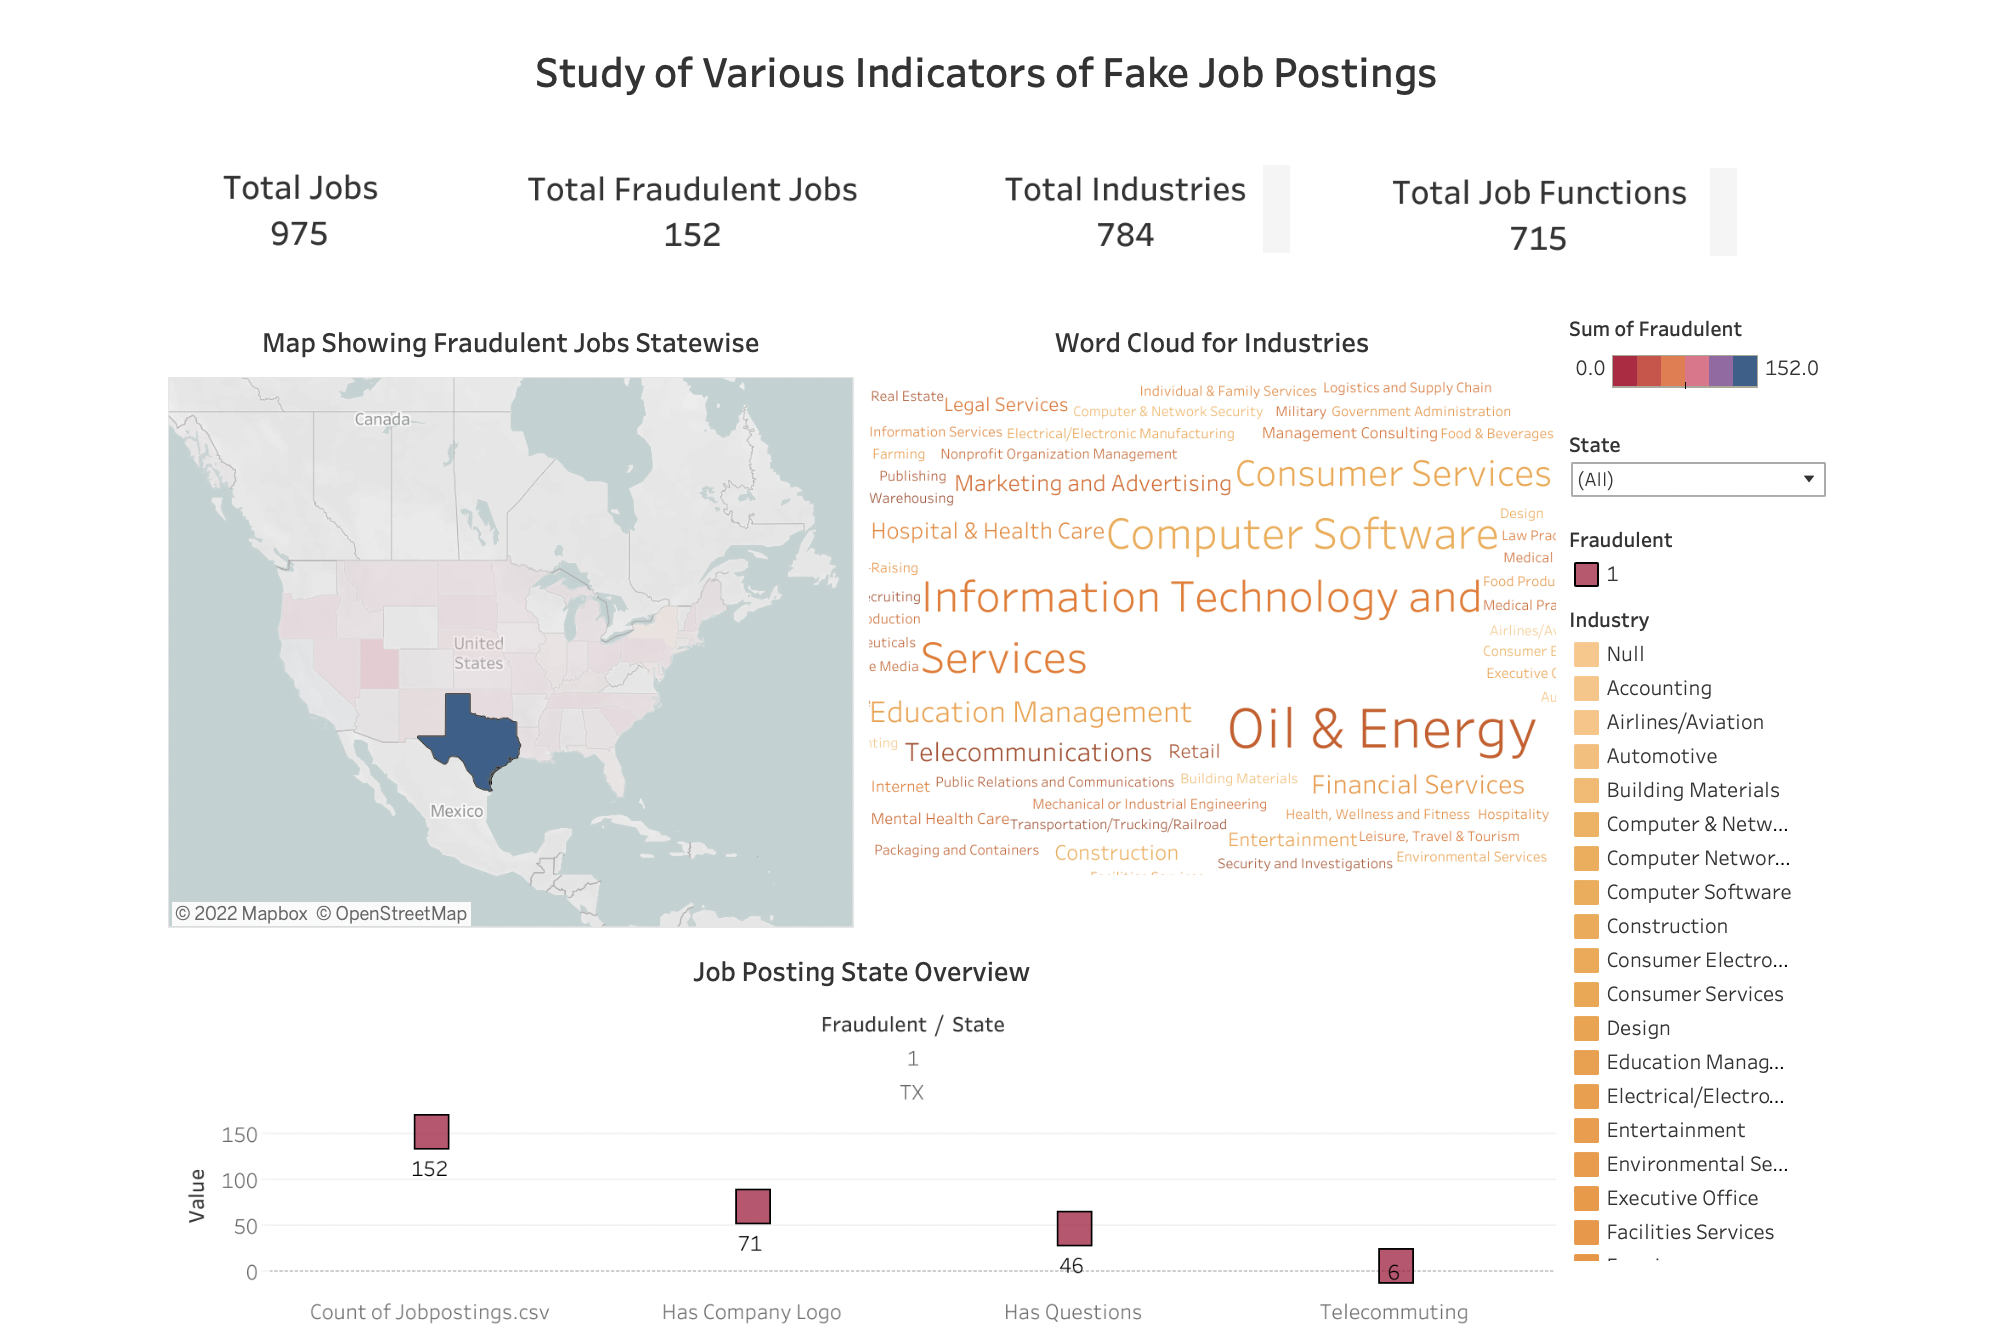

Dashboard 2 Link: https://public.tableau.com/app/profile/sucheta.das/viz/BA775TeamProject-A3D2/Dashboard2?publish=yes

Similar for Dashboard, Navigate through the bubble chart and click on states to drill down to the information present in the other three charts.

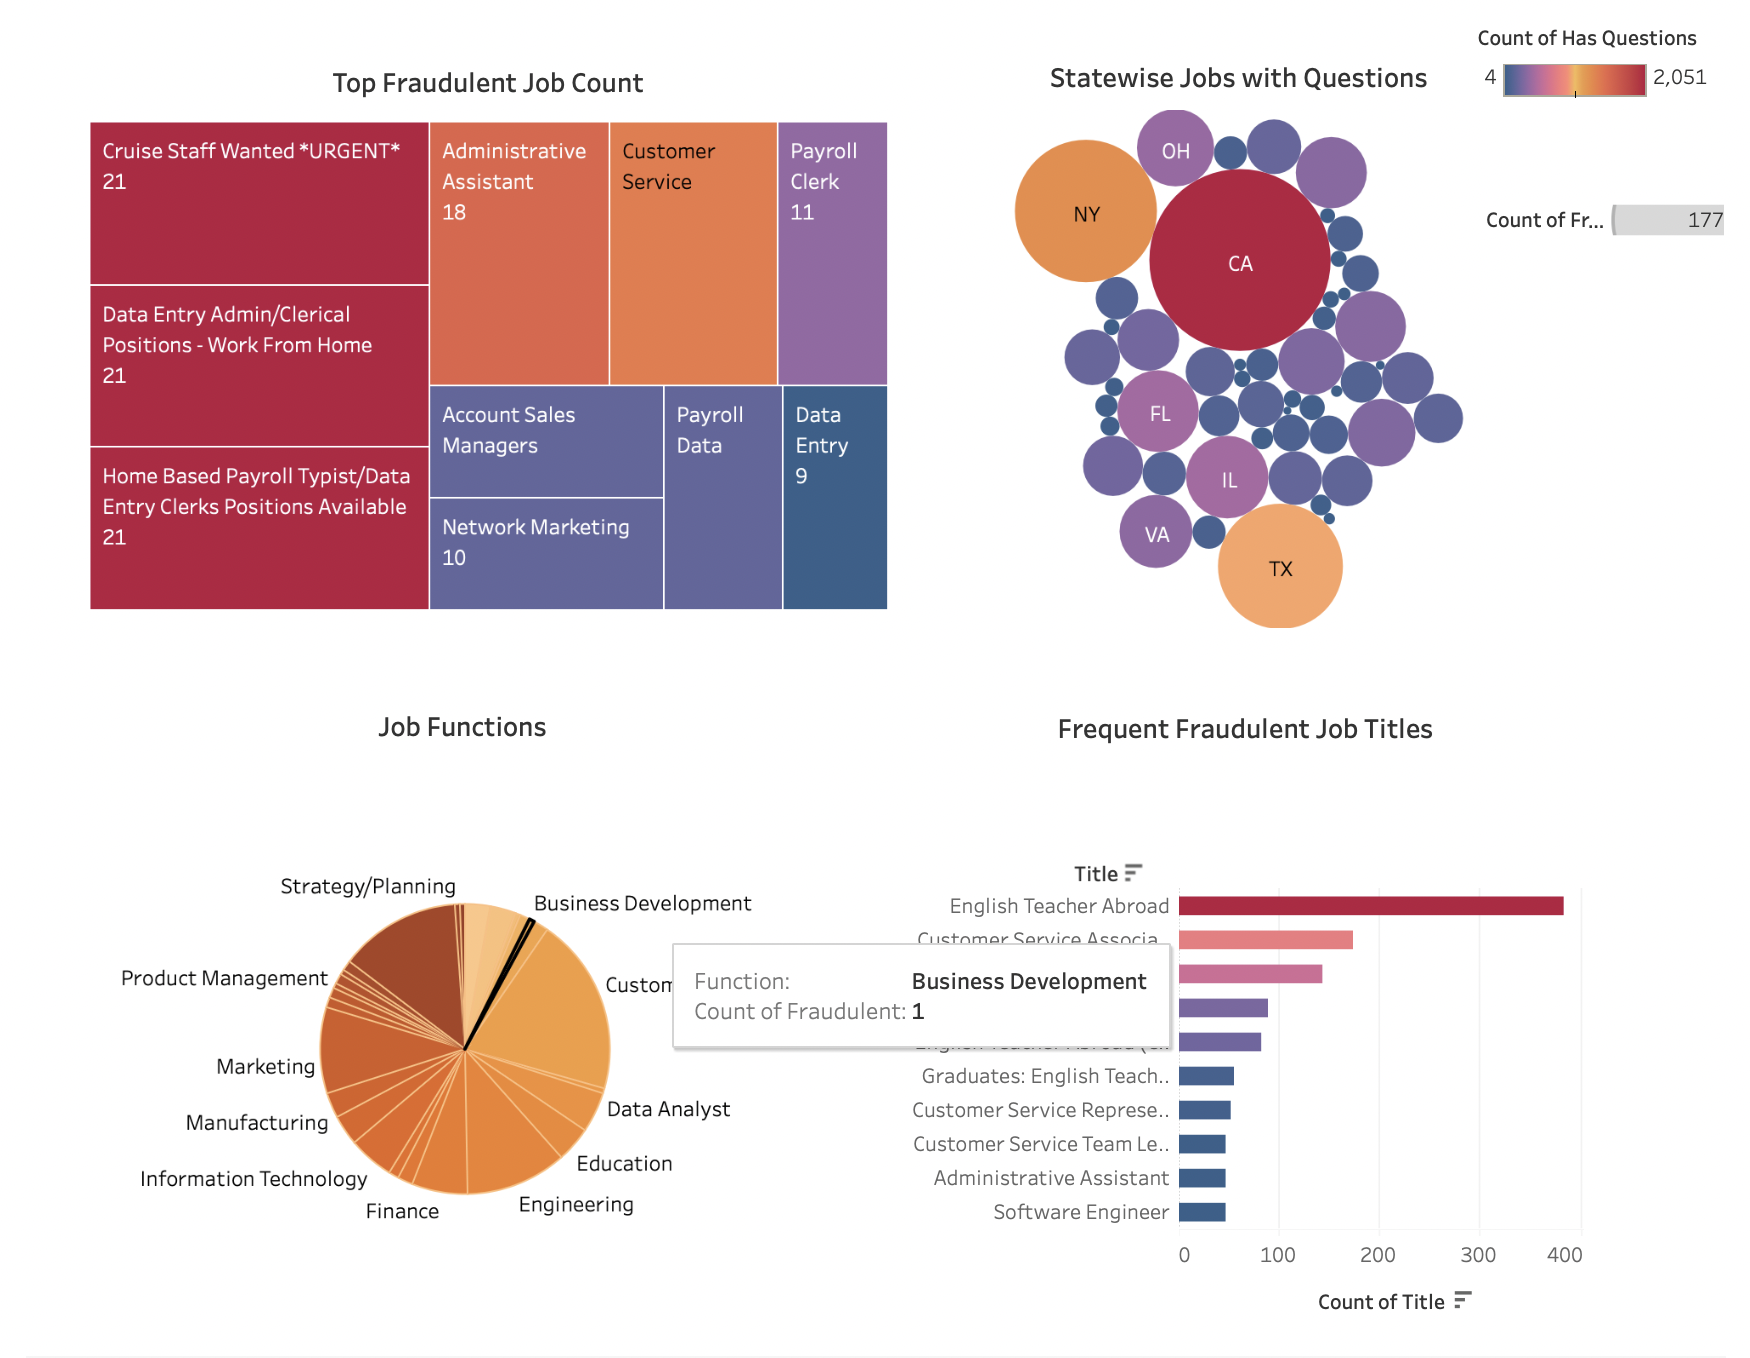

Dashboard 3 Link: https://public.tableau.com/app/profile/sucheta.das/viz/BA775TeamProject-A3D3/Dashboard3?publish=yes

Dashboard 3 depicts the top industries and top states with the highest job postings and their correlation with the education requirements.

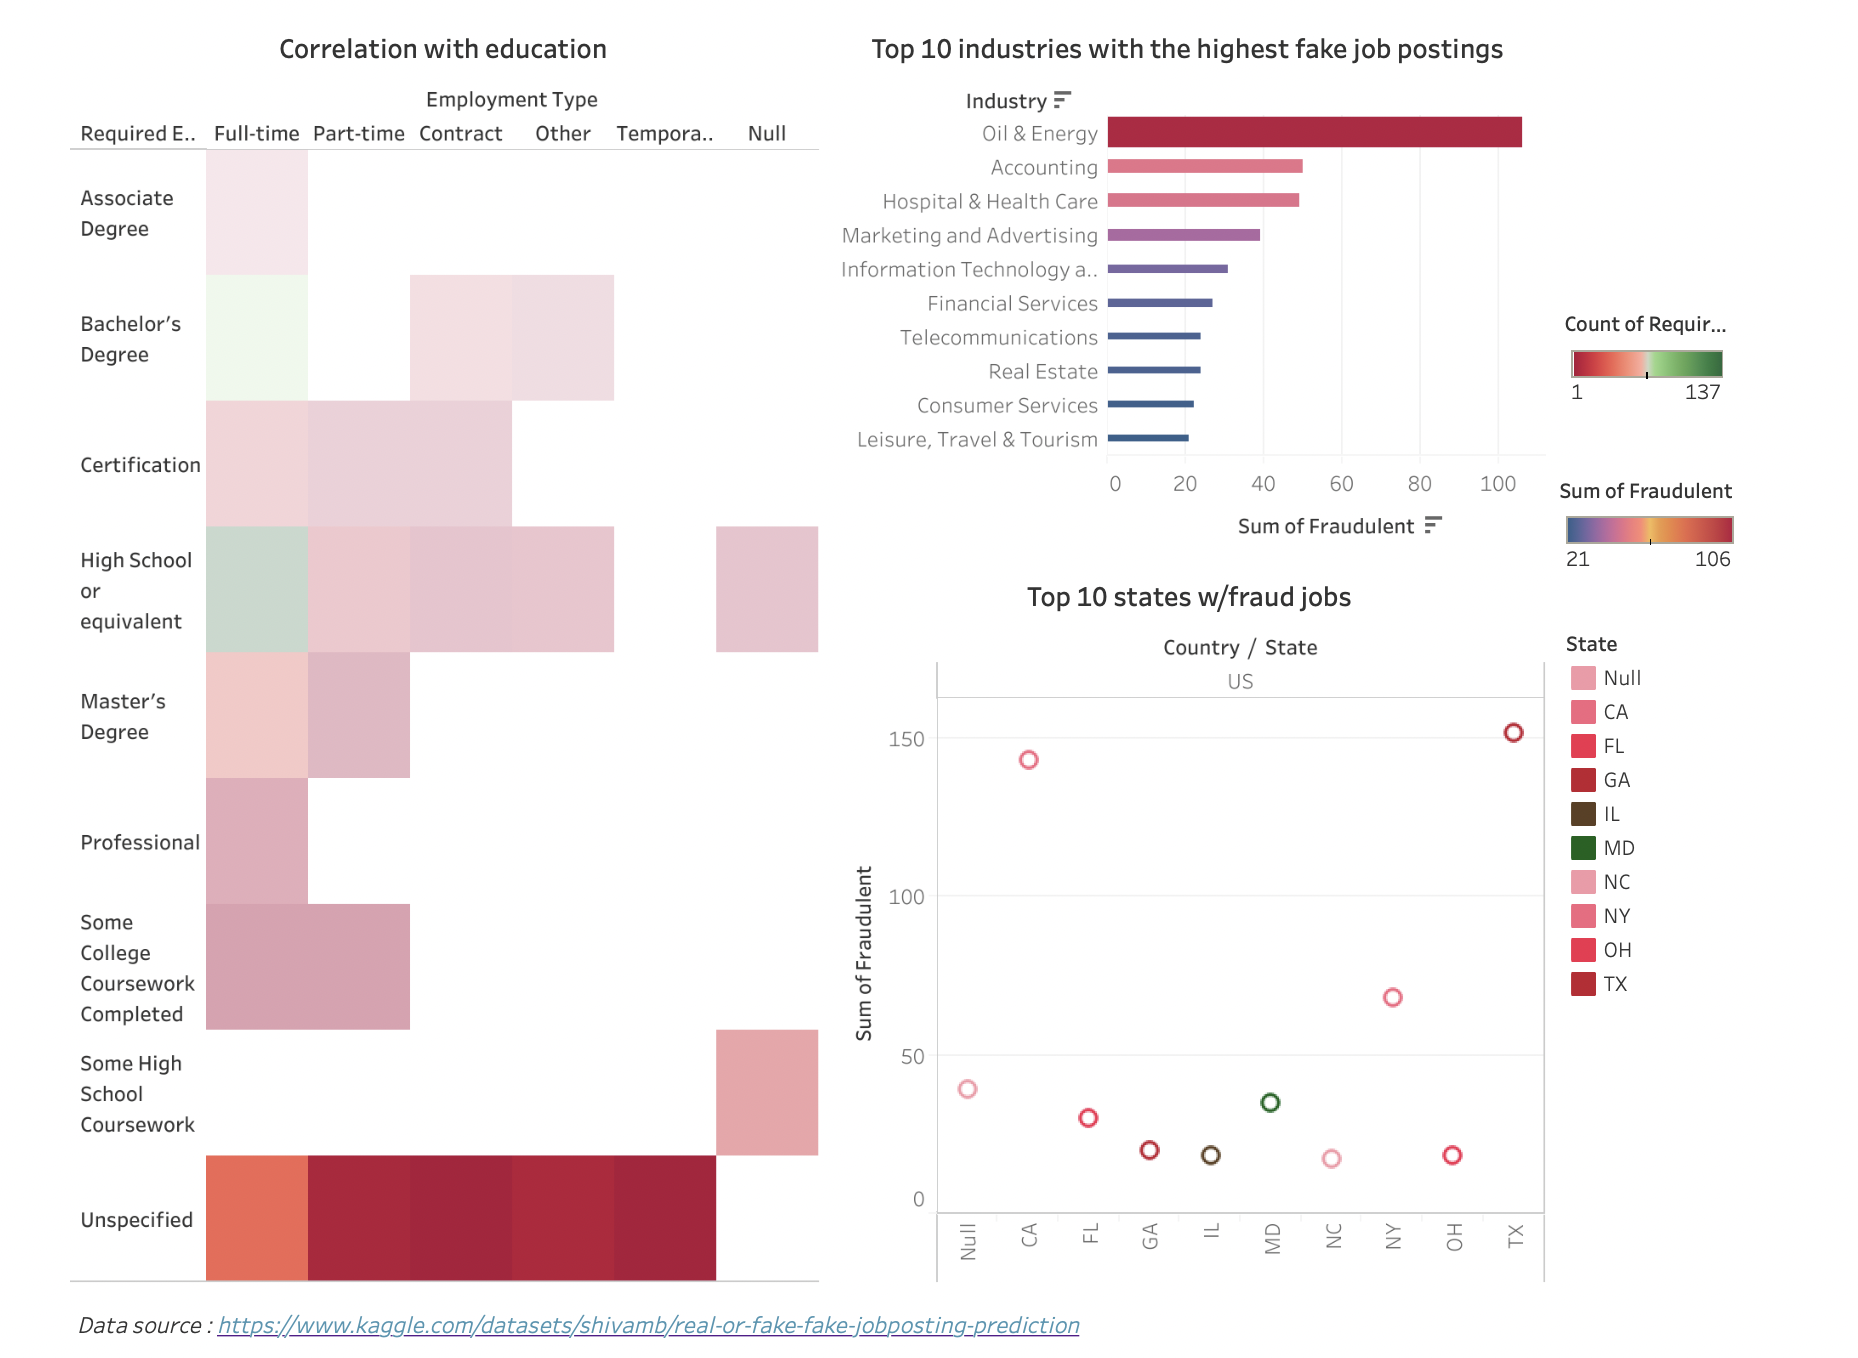